In [61]:
import tensorflow as tf
import keras

In [62]:
tf.enable_eager_execution()
tfe = tf.contrib.eager

ValueError: tf.enable_eager_execution must be called at program startup.

In [108]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [109]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50


In [110]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print(n_samples)

17


In [111]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(),name='weight')
b = tf.Variable(rng.randn(),name='bias')


In [112]:
pred = tf.add(tf.multiply(X,W), b)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
print(pred)

Tensor("Add_26:0", dtype=float32)


In [113]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.093358509 W= 0.32127365 b= 0.2858047
Epoch: 0100 cost= 0.091463462 W= 0.31701055 b= 0.31647396
Epoch: 0150 cost= 0.089787528 W= 0.31300092 b= 0.34531844
Epoch: 0200 cost= 0.088305332 W= 0.3092298 b= 0.3724479
Epoch: 0250 cost= 0.086994477 W= 0.30568287 b= 0.39796427
Epoch: 0300 cost= 0.085835263 W= 0.30234697 b= 0.4219621
Epoch: 0350 cost= 0.084810100 W= 0.29920954 b= 0.44453302
Epoch: 0400 cost= 0.083903499 W= 0.29625854 b= 0.465762
Epoch: 0450 cost= 0.083101772 W= 0.29348317 b= 0.4857281
Epoch: 0500 cost= 0.082392849 W= 0.29087296 b= 0.50450575
Epoch: 0550 cost= 0.081765927 W= 0.2884178 b= 0.5221681
Epoch: 0600 cost= 0.081211559 W= 0.28610864 b= 0.5387793
Epoch: 0650 cost= 0.080721393 W= 0.283937 b= 0.5544023
Epoch: 0700 cost= 0.080287956 W= 0.2818944 b= 0.5690969
Epoch: 0750 cost= 0.079904690 W= 0.27997318 b= 0.5829181
Epoch: 0800 cost= 0.079565808 W= 0.2781661 b= 0.59591806
Epoch: 0850 cost= 0.079266205 W= 0.2764665 b= 0.6081446
Epoch: 0900 cost= 0.079001360 W= 

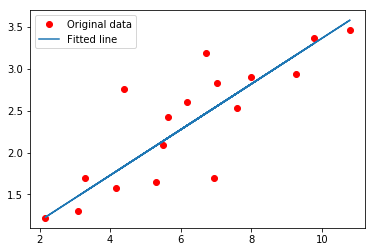

In [118]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))

    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
